## **HOTEL BOOKING CANCELLATION PREDICTION -  MARLABS POC PROJECT**

In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import seaborn as sns

#Read the data
data = pd.read_csv('hotel_bookings.csv')

#Data Shape
print('Data Shape',data.shape)
print(data.info())
data.head()

Data Shape (119390, 32)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


#EDA ANALYSIS OF THE HOTEL BOOKING DATA

Arrival Data Analysis

Text(0.5, 1.0, 'Graph showing number of arrival per year')

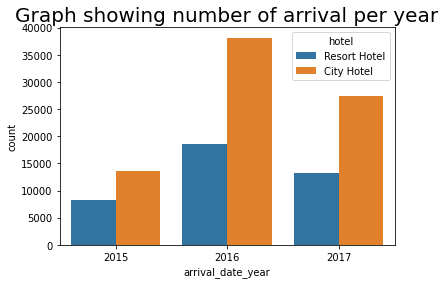

In [87]:
lst3 = ['hotel', 'arrival_date_year', 'arrival_date_month','arrival_date_day_of_month' ]
period_arrival = data[lst3]
sns.countplot(data = period_arrival, x = 'arrival_date_year',hue = 'hotel').set_title('Graph showing number of arrival per year',fontsize=20)

Text(0, 0.5, 'Count')

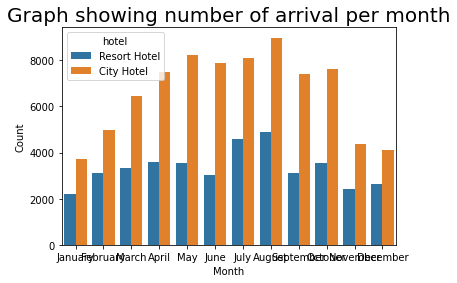

In [88]:
sns.countplot(data = period_arrival, x = 'arrival_date_month', hue = 'hotel', order = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
          'August', 'September', 'October', 'November', 'December']).set_title('Graph showing number of arrival per month',fontsize=20)
plt.xlabel('Month')
plt.ylabel('Count')

 Missing Values Analysis

Missing Values in the given dataset displayed and then plotted as a bar graph

children         4
country        488
agent        16340
company     112593
dtype: int64


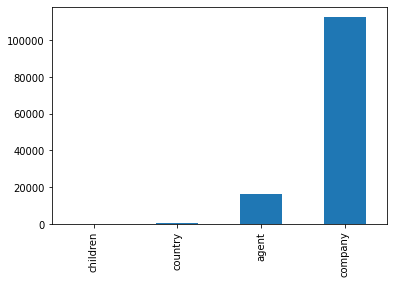

In [97]:
missing = data.isnull().sum()
missing = missing[missing > 0]
print(missing)
missing.plot.bar()

Cancellation Data Analysis

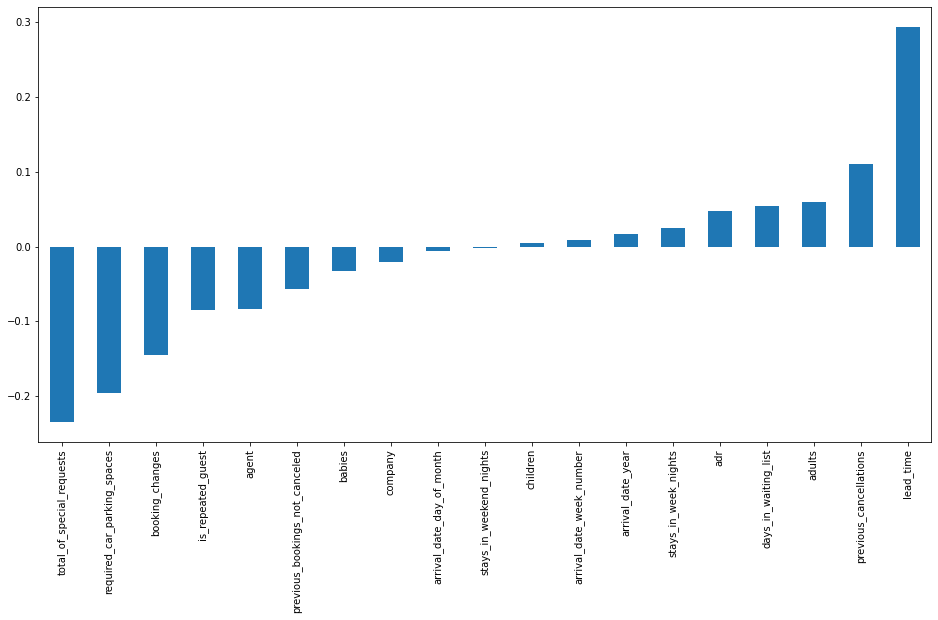

In [98]:
plt.figure(figsize=(16,8))
data.corr()['is_canceled'].sort_values()[:-1].plot(kind='bar')
plt.show()

Correlation of Variables with Each Other

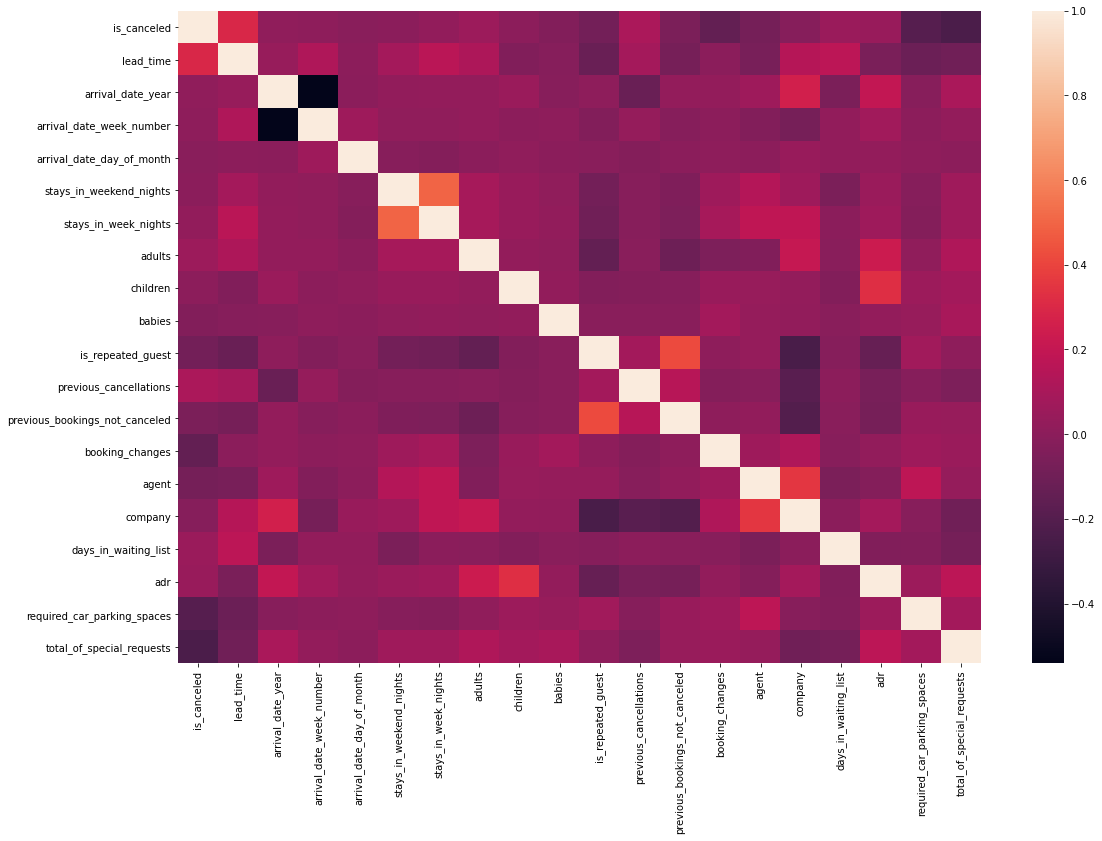

In [99]:
corrmat = data.corr()
plt.subplots(figsize=(18,12))
sns.heatmap(corrmat)

Rooms Vs Stay during WeekDays

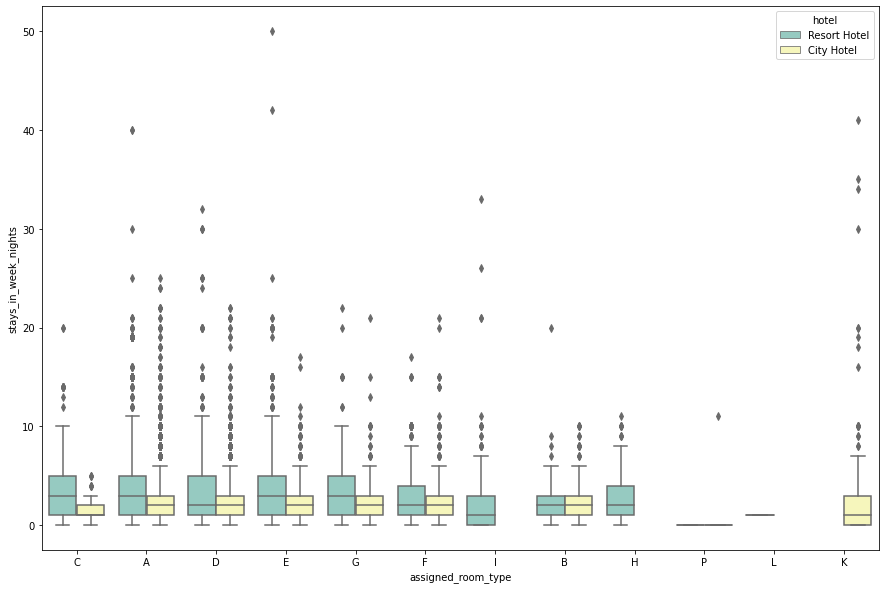

In [100]:
plt.figure(figsize = (15,10))
sns.boxplot(x = "assigned_room_type", y = "stays_in_week_nights", data = data, hue = "hotel", palette = 'Set3');

Rooms Vs Stay During Weekends

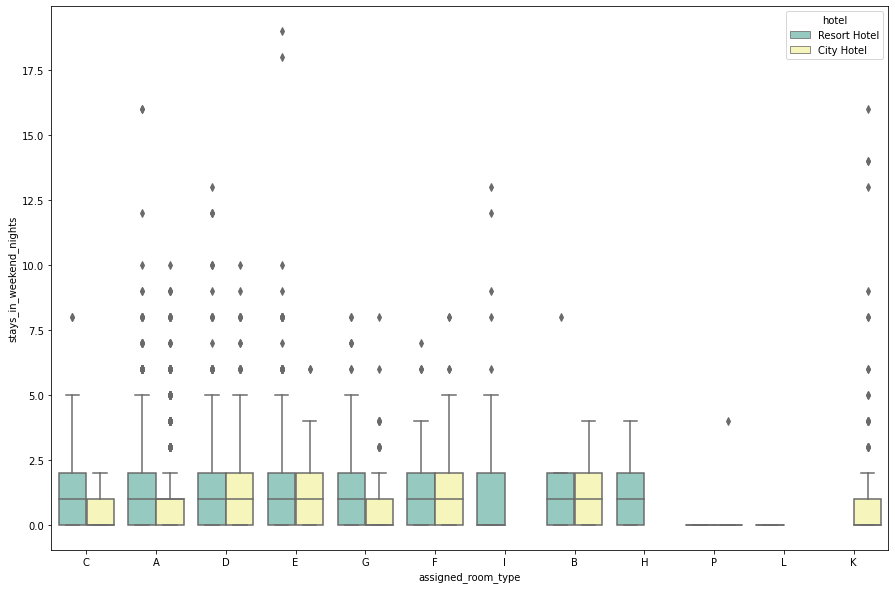

In [101]:
plt.figure(figsize = (15,10))
sns.boxplot(x = "assigned_room_type", y = "stays_in_weekend_nights", data = data, hue = "hotel", palette = 'Set3');

Types of People Analysis

Text(0.5, 1.0, 'Number of Adults according to the Hotel')

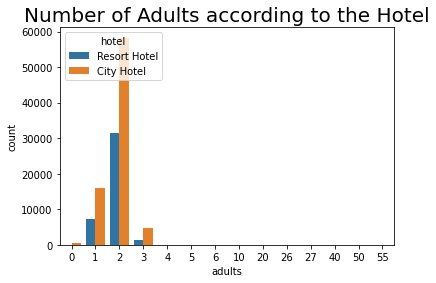

In [102]:
sns.countplot(data=data, x = 'adults', hue = 'hotel').set_title("Number of Adults according to the Hotel", fontsize = 20)

Text(0.5, 1.0, 'Number of Children according to the Hotel')

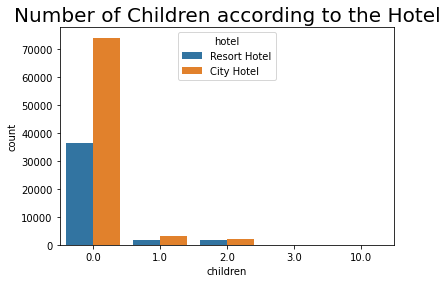

In [103]:
sns.countplot(data=data, x = 'children', hue = 'hotel').set_title("Number of Children according to the Hotel", fontsize = 20)

Text(0.5, 1.0, 'Number of Babies according to the Hotel')

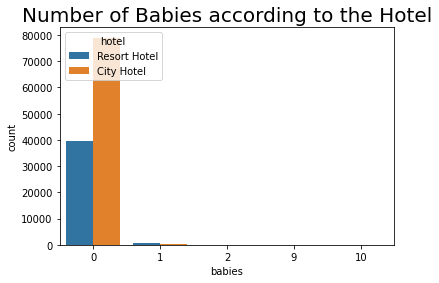

In [104]:
sns.countplot(data=data, x = 'babies', hue = 'hotel').set_title("Number of Babies according to the Hotel", fontsize = 20)

Marketing Segment Analysis and Distribution Channel Analysis

['Online TA', 'Offline TA/TO', 'Groups', 'Direct', 'Corporate', 'Complementary', 'Aviation', 'Undefined']


([<matplotlib.patches.Wedge at 0x7fbf3b753c88>,
 [Text(-1.096058707664637, 0.09303391506609886, 'Online TA'),
  Text(0.5412548006258437, -1.0710010461243622, 'Offline TA/TO'),
  Text(1.0982920809493013, 0.06127401508023908, 'Groups'),
  Text(0.6762108172368282, 0.8676052850530022, 'Direct'),
  Text(0.20883684267708547, 1.0799940616228714, 'Corporate'),
  Text(0.03533576241922009, 1.0994323007326339, 'Complementary'),
  Text(0.006975627070003245, 1.0999778818808041, 'Aviation'),
  Text(5.7802397961496256e-05, 1.0999999984813105, 'Undefined')],
 [Text(-0.597850204180711, 0.05074577185423573, '47.3%'),
  Text(0.3157319670317421, -0.6247506102392113, '20.3%'),
  Text(0.599068407790528, 0.033422190043766765, '16.6%'),
  Text(0.3688422639473608, 0.47323924639254655, '10.6%'),
  Text(0.11391100509659206, 0.5890876699761115, '4.4%'),
  Text(0.019274052228665503, 0.5996903458541638, '0.6%'),
  Text(0.0038048874927290423, 0.5999879355713477, '0.2%'),
  Text(3.152858070627068e-05, 0.5999999991716

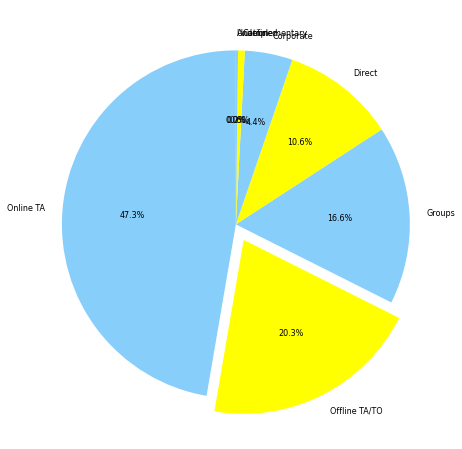

In [107]:
plt.rcParams['figure.figsize'] = 8,8

# Indexing labels. tolist() will convert the index to list for easy manipulation
labels = data['market_segment'].value_counts().index.tolist()
print(labels)
# Convert value counts to list
sizes = data['market_segment'].value_counts().tolist()


# As the name suggest, explode will determine how much each section is separated from each other 
explode = (0,0.1,0,0,0,0,0,0)

# Determine colour of pie chart
colors = ['lightskyblue','yellow']

#Plot the Pie Chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',startangle=90, textprops={'fontsize': 8})

['TA/TO', 'Direct', 'Corporate', 'GDS', 'Undefined']


([<matplotlib.patches.Wedge at 0x7fbf3bce64e0>,
 [Text(-0.5901376646290238, -0.9282981938936442, 'TA/TO'),
  Text(0.8154852102259047, 0.8803316828916316, 'Direct'),
  Text(0.20354879671045964, 1.0810031856371767, 'Corporate'),
  Text(0.005876039773296818, 1.099984305413756, 'GDS'),
  Text(0.00014494369649659418, 1.0999999904506021, 'Undefined')],
 [Text(-0.32189327161583114, -0.5063444693965332, '82.0%'),
  Text(0.4756997059651111, 0.5135268150201183, '12.3%'),
  Text(0.11102661638752342, 0.5896381012566417, '5.6%'),
  Text(0.0032051126036164454, 0.599991439316594, '0.2%'),
  Text(7.906019808905135e-05, 0.5999999947912374, '0.0%')])

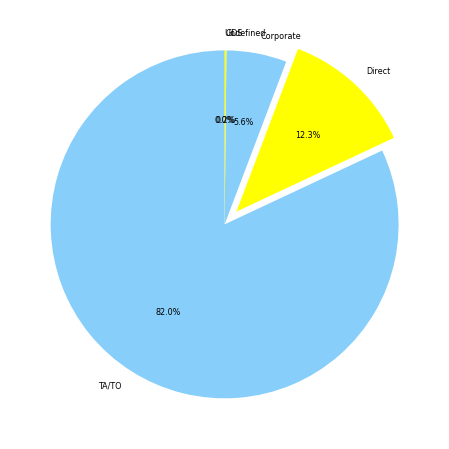

In [108]:
plt.rcParams['figure.figsize'] = 8,8

# Indexing labels. tolist() will convert the index to list for easy manipulation
labels = data['distribution_channel'].value_counts().index.tolist()
print(labels)
# Convert value counts to list
sizes = data['distribution_channel'].value_counts().tolist()


# As the name suggest, explode will determine how much each section is separated from each other 
explode = (0,0.1,0,0,0)

# Determine colour of pie chart
colors = ['lightskyblue','yellow']

#Plot the Pie Chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',startangle=90, textprops={'fontsize': 8})

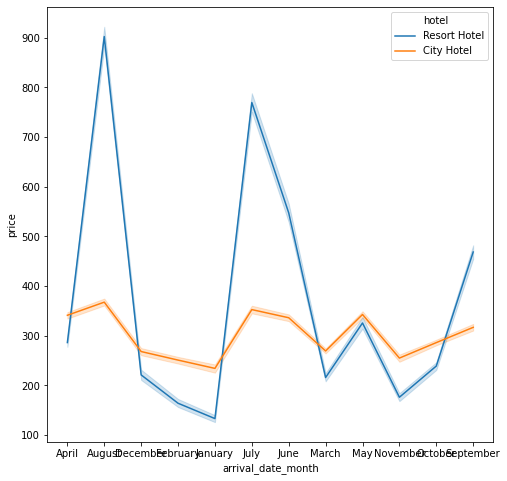

In [109]:
data["adr_pp"] = data["adr"] / (data["adults"] + data["children"])
data = data.loc[data["is_canceled"] == 0] # only actual gusts
#actual_guests = data.loc[data["is_canceled"] == 'not_canceled']
data['price'] = data['adr'] * (data['stays_in_weekend_nights'] + data['stays_in_week_nights'])
sns.lineplot(data = data, x = 'arrival_date_month', y = 'price', hue = 'hotel')

Conclusion from Analysis:

1.   Prices of the Resort hotel are very high during the summer months(June - September).
2.   The number of arrivals was maximum in the year 2016.
3.   The rooms were booked more during the weekends as compared to the weekdays.




# Modelling the Data

In [110]:
data = pd.read_csv('hotel_bookings.csv')

In [111]:
data.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [112]:
data['children'] = data['children'].fillna(data['children'].median(),axis=0)
data['country']=data['country'].fillna(data['country'].mode().to_string() )

In [113]:
data.drop('agent',axis=1,inplace=True)
data.drop('company',axis=1,inplace=True)

In [114]:
data.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [115]:
data_obj = [ 'hotel','stays_in_week_nights','adults','children','babies','distribution_channel','is_repeated_guest',
'previous_bookings_not_canceled','assigned_room_type','customer_type','adr','required_car_parking_spaces'
, 'arrival_date_month','meal','country','market_segment','reserved_room_type','reserved_room_type','reservation_status',
             'reservation_status_date','deposit_type','reserved_room_type','reserved_room_type'
             ,'reserved_room_type']
data [data_obj]= data [ data_obj].astype('category')

In [116]:
data.dtypes

hotel                             category
is_canceled                          int64
lead_time                            int64
arrival_date_year                    int64
arrival_date_month                category
arrival_date_week_number             int64
arrival_date_day_of_month            int64
stays_in_weekend_nights              int64
stays_in_week_nights              category
adults                            category
children                          category
babies                            category
meal                              category
country                           category
market_segment                    category
distribution_channel              category
is_repeated_guest                 category
previous_cancellations               int64
previous_bookings_not_canceled    category
reserved_room_type                  object
assigned_room_type                category
booking_changes                      int64
deposit_type                      category
days_in_wai

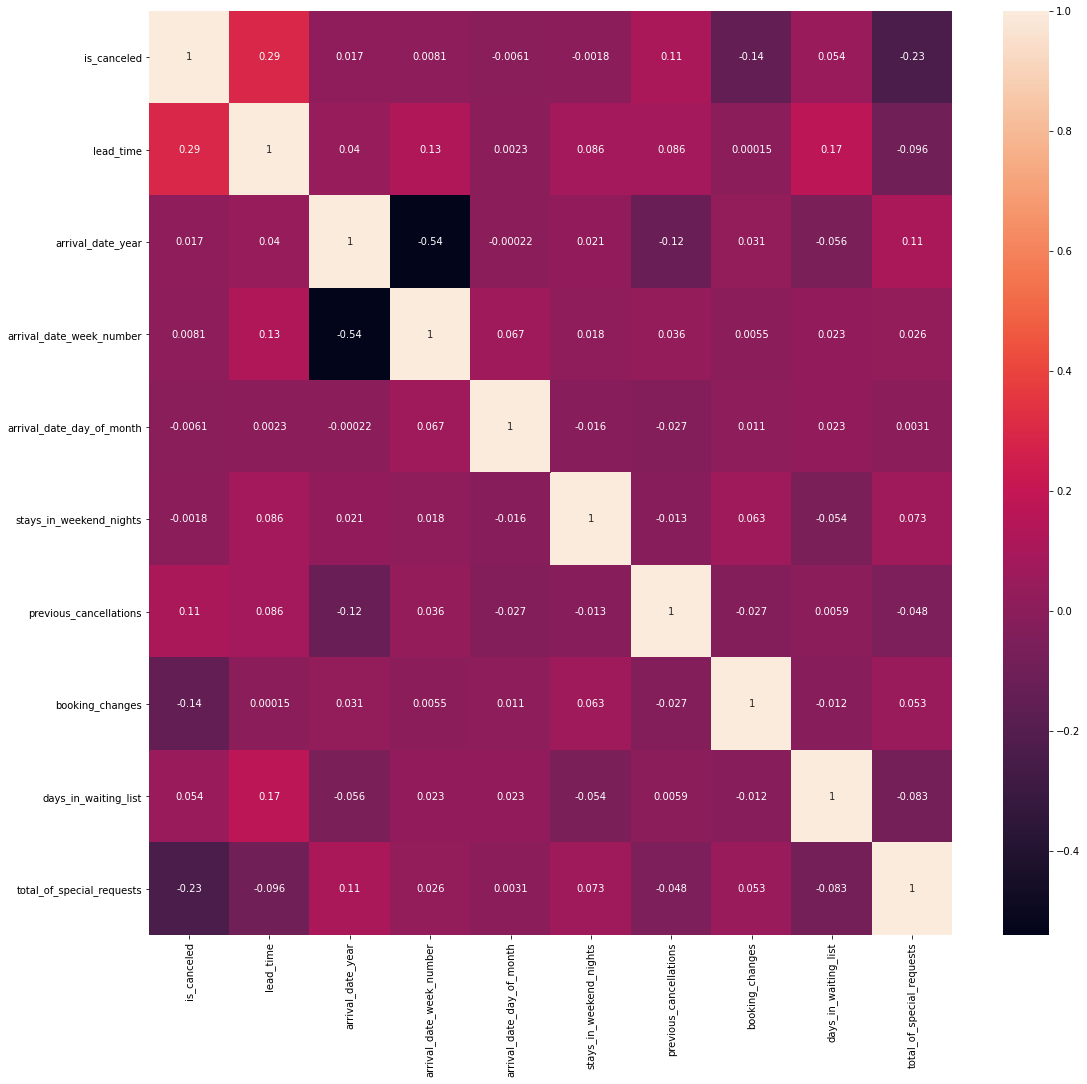

In [117]:
fig,axes = plt.subplots(1,1,figsize=(18,17))
sns.heatmap(data.corr(),annot=True)
plt.show()

In [118]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder()
features=['lead_time','total_of_special_requests','required_car_parking_spaces','booking_changes',
          'previous_cancellations','is_repeated_guest','adults','previous_bookings_not_canceled','days_in_waiting_list'
        , 'hotel',
'arrival_date_month',
'stays_in_week_nights',
'adults',
'children',
'babies',
'country',
'market_segment',
'distribution_channel',
'is_repeated_guest',
'previous_bookings_not_canceled',
'deposit_type',
'customer_type',
'adr',
'required_car_parking_spaces'
]


In [119]:
for i in features :
    data[i] = label_encoder.fit_transform(data[i])

In [120]:
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor  
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

In [121]:
X=data[features]
y=data['is_canceled']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

Creation of an array for accuracy of the different models

In [123]:
# Empty dictionary of model accuracy results
model_accuracy_results = {}

# Function for calculating accuracy from confusion matrix
from sklearn.metrics import confusion_matrix
def model_accuracy(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    accuracy = ((cm[0,0] + cm [1,1]) * 100 / len(y_test)).round(2)
    return accuracy

Baseline Model

In [124]:
(unique, counts) = np.unique(y_train, return_counts=True)
if counts[0]  > counts[1]:
    idx = 0
else:
    idx = 1

# Applying baseline results to y_pred
if idx == 0:
    y_pred = np.zeros(y_test.shape)
else:
    y_pred = np.ones(y_test.shape)

# Computing accuracy
model_accuracy_results['Baseline'] = model_accuracy(y_test, y_pred)

Logistic Regression Model

In [125]:
# Fit and train
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0, max_iter=250)
classifier.fit(X_train, y_train)

# Predict
y_pred = classifier.predict(X_test)

# Computing accuracy
model_accuracy_results['LogisticRegression'] = model_accuracy(y_test, y_pred)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Random Forest Model

In [127]:
# Fit and train
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
classifier.fit(X_train,y_train)

# Predict
y_pred = classifier.predict(X_test)

# Computing accuracy
model_accuracy_results['RandomForest'] = model_accuracy(y_test, y_pred)

Decision Tree Model

In [128]:
# Fit and train
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(max_depth=12)
classifier.fit(X_train,y_train)

# Predict
y_pred = classifier.predict(X_test)

# Computing accuracy
model_accuracy_results['DecisionTree'] = model_accuracy(y_test, y_pred)

Accuracies for the Different Models

In [129]:
df_model_accuracies = pd.DataFrame(list(model_accuracy_results.values()), index=model_accuracy_results.keys(), columns=['Accuracy'])
df_model_accuracies

,Accuracy
Baseline,62.42
LogisticRegression,75.88
RandomForest,86.84
DecisionTree,83.45


##Model Optimization 

In [130]:
# Grid Search
from sklearn.model_selection import GridSearchCV
parameters = [{'n_estimators': [10,25,50,100,500] , 'criterion': ['entropy', 'gini']}]
randomforestclassifier = RandomForestClassifier()
grid_search = GridSearchCV(estimator = randomforestclassifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           n_jobs = -1)
grid_search.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              ra

In [131]:
print('Best Score: ', grid_search.best_score_.round(2))
print('Best Parameters: ', grid_search.best_params_)

Best Score:  0.87
Best Parameters:  {'criterion': 'entropy', 'n_estimators': 500}


In [132]:
# Fit and train
optimized_classifier = RandomForestClassifier(n_estimators=500, criterion='entropy', random_state=0)
optimized_classifier.fit(X_train,y_train)

# Predict
y_pred = optimized_classifier.predict(X_test)

# Computing accuracy
model_accuracy_results['OptimizedRandomForest'] = model_accuracy(y_test, y_pred)

In [133]:
df_model_accuracies = pd.DataFrame(list(model_accuracy_results.values()), index=model_accuracy_results.keys(), columns=['Accuracy'])
df_model_accuracies

,Accuracy
Baseline,62.42
LogisticRegression,75.88
RandomForest,86.84
DecisionTree,83.45
OptimizedRandomForest,87.78


## Evaluation of Models

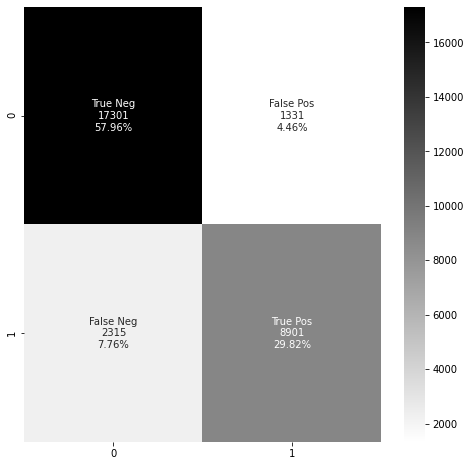

In [134]:
orf_cm = confusion_matrix(y_test, optimized_classifier.predict(X_test))

names = ['True Neg','False Pos','False Neg','True Pos'] # list of descriptions for each group
values = [value for value in orf_cm.flatten()] # list of values for each group
percentages = [str(perc.round(2))+'%' for perc in orf_cm.flatten()*100/np.sum(orf_cm)] # list of percentages for each group
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(names,values,percentages)] # zip them into list of strings as labels
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(orf_cm, annot=labels, fmt='', cmap='binary')